In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

countylist = []
stateslist = []
reportingcount = []

#lets get covid data
coviddata = pd.DataFrame(pd.read_csv(r"C:\Users\mdsnb\Downloads\us-counties-2021.csv"))
print('The number of rows in coviddata:', len(coviddata.index))
print(coviddata.head())

def listindices(list_to_check, item_to_find):
    indices = []
    for idx, value in enumerate(list_to_check):
        if value == item_to_find:
            indices.append(idx)
    return indices

#getting sum infections for 2021 by county

for k in range(len(coviddata.index)):

    countyname = coviddata.loc[k, 'county']
    #print('Name:',countyname,)

    #making an associated state entry
    countystate = coviddata.loc[k, 'state']
    #print('county state',countystate)

    #for every row checking if the county name is in countylist
    if (countyname in countylist) is True:

        #call an array of indices
        tempindices = listindices(countylist, countyname)
        #print(tempindices)

        #iterate over array of indices to see if states match
        for i in tempindices:
            if stateslist[i] == countystate:
                #print(reportingcount[i])

                #if they do, update the associated entry in the cases list by the new amount
                reportingcount[i] += 1
       
    #otherwise adding country name, this entry cases, and the associated state
    else:

        #print('this county does not exist yet - ', countyname)
        countylist.append(countyname)
        stateslist.append(countystate)
        reportingcount.append(1)

The number of rows in coviddata: 1185373
         date   county    state    fips  cases  deaths
0  2021-01-01  Autauga  Alabama  1001.0   4239    50.0
1  2021-01-01  Baldwin  Alabama  1003.0  13823   169.0
2  2021-01-01  Barbour  Alabama  1005.0   1517    33.0
3  2021-01-01     Bibb  Alabama  1007.0   1854    46.0
4  2021-01-01   Blount  Alabama  1009.0   4693    63.0


1930 1930
number of unique counties produced 1930 average reporting =  365.0 stdev reporting = 0.0


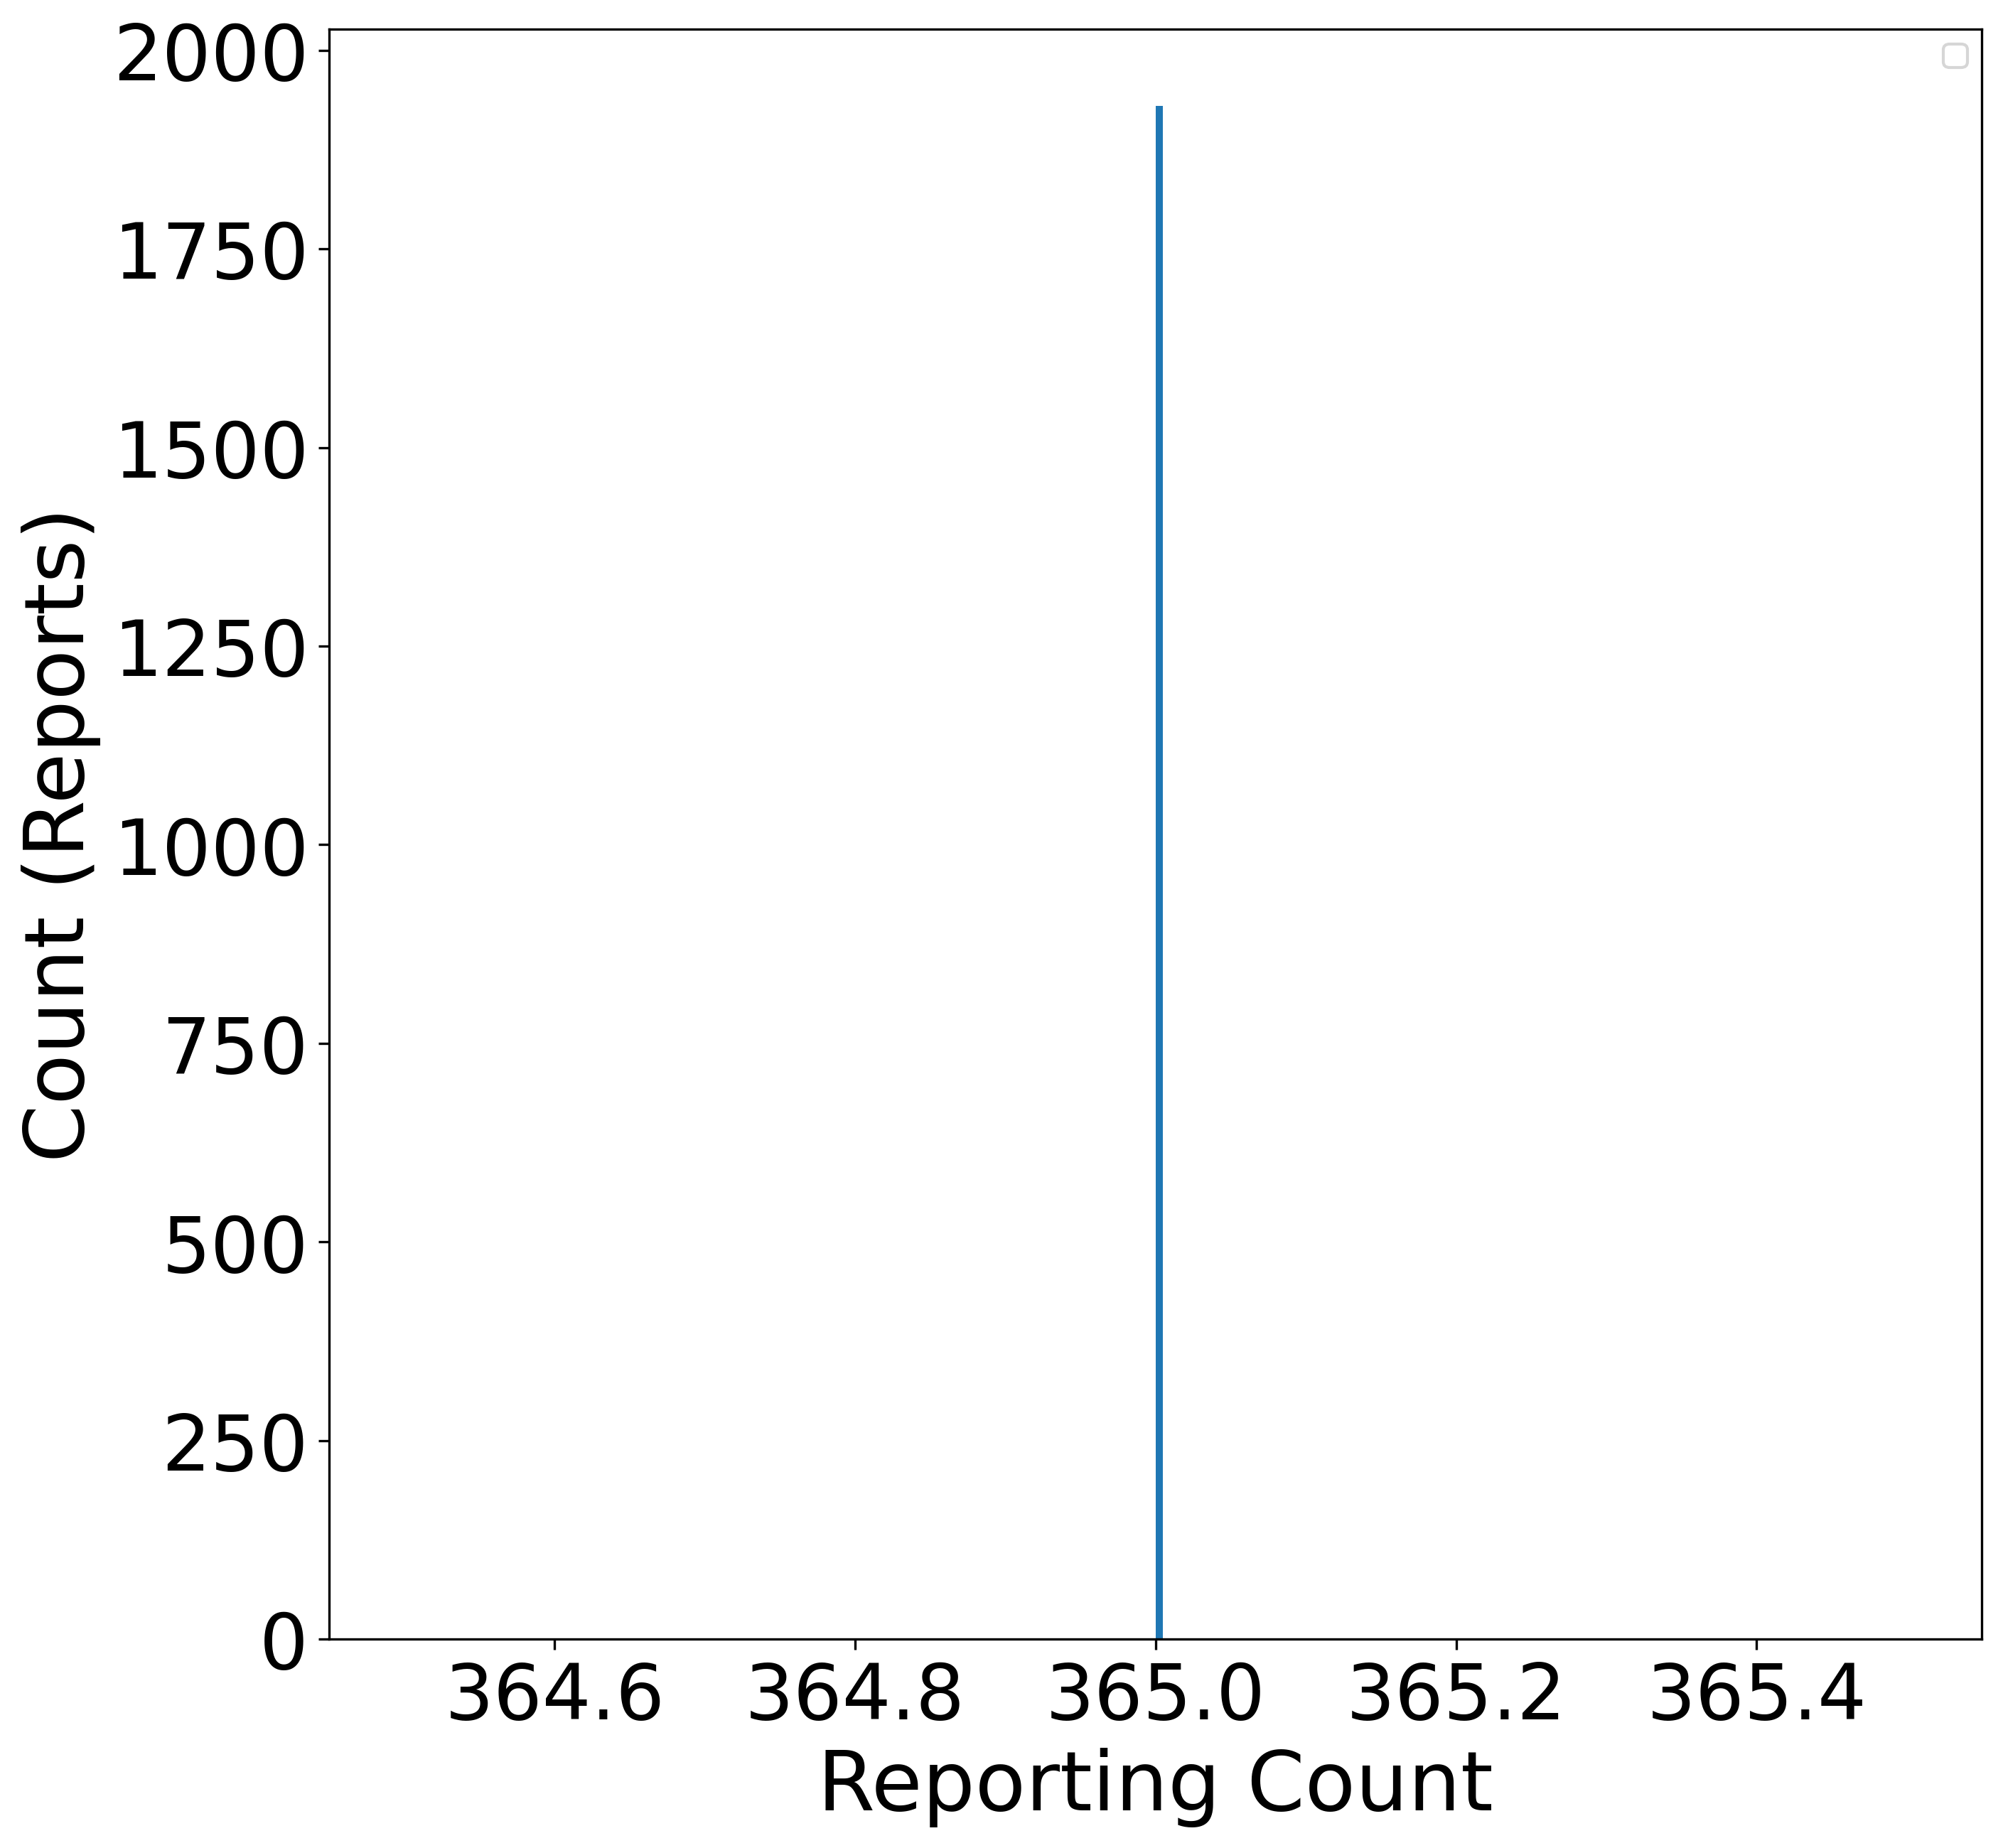

In [11]:
print(len(reportingcount),len(countylist))
figure(figsize = (10, 10), dpi = 300)
plt.hist(reportingcount, bins = 200)
plt.legend('')
plt.xlabel('Reporting Count', fontsize=28)
plt.ylabel('Count (Reports)', fontsize=28)
plt.tick_params(labelsize=26)

#verifying that the correct counties were tabulated
print('number of unique counties produced',len(countylist), 'average reporting = ', np.average(reportingcount), 'stdev reporting =', np.std(reportingcount))

"Infections" in the early coding is just average cases * 365, the reporting count